# Secondary Eclipse of WASP-121 b

### Import `lightkurve`, `astropy`, and retrieve relevant data:

In [6]:
import lightkurve as lk
import numpy as np
from matplotlib import pyplot as plt

##Find and download all data for WASP-121 from the QLP pipeline
data = lk.search_lightcurve("WASP-121", author="QLP").download_all()

### Detrend, Normalize, and remove NANs

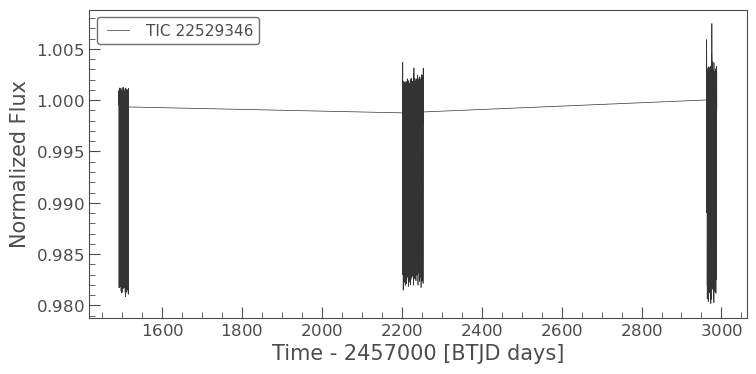

In [7]:
##Normalize and remove outliers from each lightcurve. 
##It is important to normalize each lightcurve individually before appending, as median flux can change from visit-to-visit
for index, light_curves in enumerate(data):
    ##The flatten method normalizes in addition to detrending. To only normalize, use the .normalize() method.
    data[index] = data[index].flatten()
    data[index] = data[index].remove_outliers()
    
#Now stitch them together
lc = data.stitch()
##Show the plot to ensure we have the right data
lc.plot()
plt.show()

### Use Box-Least Squares (BLS) to Determine Period, Epochs, and Transit Depth

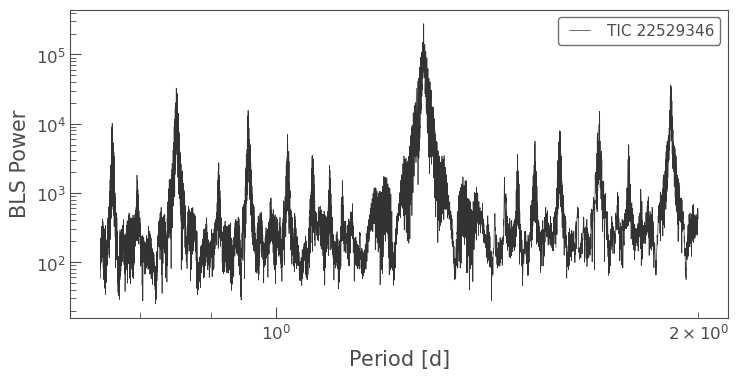

lightkurve.Periodogram properties:
        Attribute                   Description            Units
------------------------- -------------------------------- -----
                 targetid                         22529346      
             default_view                           period      
                    label                     TIC 22529346      
                time_unit                              day      
       depth_at_max_power                           0.0155      
    duration_at_max_power                              0.1     d
   frequency_at_max_power                           0.7844 1 / d
                max_power                      278759.2992      
      period_at_max_power                           1.2749     d
                    depth                    array (5334,)      
                 duration                    array (5334,)     d
                     flux                   array (18695,)      
                frequency                    array (533

In [30]:
##We can generate a BLS model by using LightKurves built in methods
##Frequency_factor is a parameter that informs how fine of a period
##grid the BLS should sample over, at the cost of higher computation time.
##The smaller the number, the finer the grid. 4 should give plenty of precision.
##In our case, a factor of 7000 does quite well
periodogram = lc.to_periodogram(method = "bls", minimum_period = 0.75, maximum_period = 2, frequency_factor=7000)

##Plot the results. Note the log scale on the y axis and large peak at around 1.3 days!
periodogram.plot(view='period', scale='log')
plt.show()

##We can get the best period and depth by using the .show_properties() method for the BLS fit
print(periodogram.show_properties())

##Grab the parameters of interest
best_period = periodogram.period_at_max_power
best_depth = periodogram.depth_at_max_power
best_epoch = periodogram.transit_time_at_max_power
print("The best period is: " + str(best_period))
print("The best depth is: " + str(best_depth))
print("The transit epoch is: " + str(best_epoch))

### Create the Phase Folded Light Curve

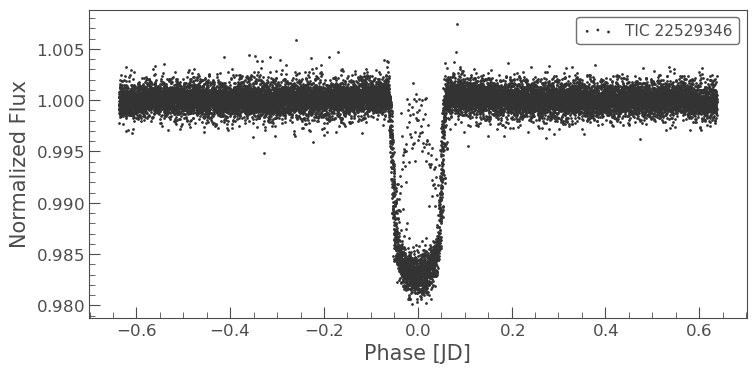

In [ ]:
##Use our best-guess parameters from above
folded_data = lc.fold(period=best_period, epoch_time=best_epoch)
folded_data.scatter()
plt.show()
##Looks great! 

### Determine Depth and Epoch